# The double-slit paradox: demystifying wave-particle duality by coding quantum circuits with Qiskit


Welcome to the code tutorial for the “Double-Slit” installment of the Paradoxes series on the Qiskit YouTube channel. In this tutorial, we’ll help you develop a better understanding of the famous quantum version of the double-slit thought experiment, and of the apparent paradox of wave-particle duality. To do this, we'll  simplify the original thought experiment into a quantum circuit that we can simulate with Qiskit!

If you haven't already, I recommend you first watch [our video](https://youtu.be/CI41yWg38Oo) on the Qiskit YouTube channel, which explains the context of the thought experiment and provides a useful overview of the Qiskit code we’ll use to simulate it in this tutorial. I also suggest reading the blog post (link coming soon) for a deeper look at the background of the thought experiment.

Let's summarise the thought experiment, simulating each step using Qiskit code:

**Summary of double-slit thought experiment**

The premise of the double slit experiment is that you send a stream of particles, for example photons or electrons, towards a barrier with two slits. I'll generally refer only to photons throughout the rest of this notebook, but the same conclusions apply for electrons and other particles. 

On the other side of the barrier is a screen, which detects the intensity of the output beam at different points. We send the photons through the double slit one by one, and look at the pattern on the screen.  

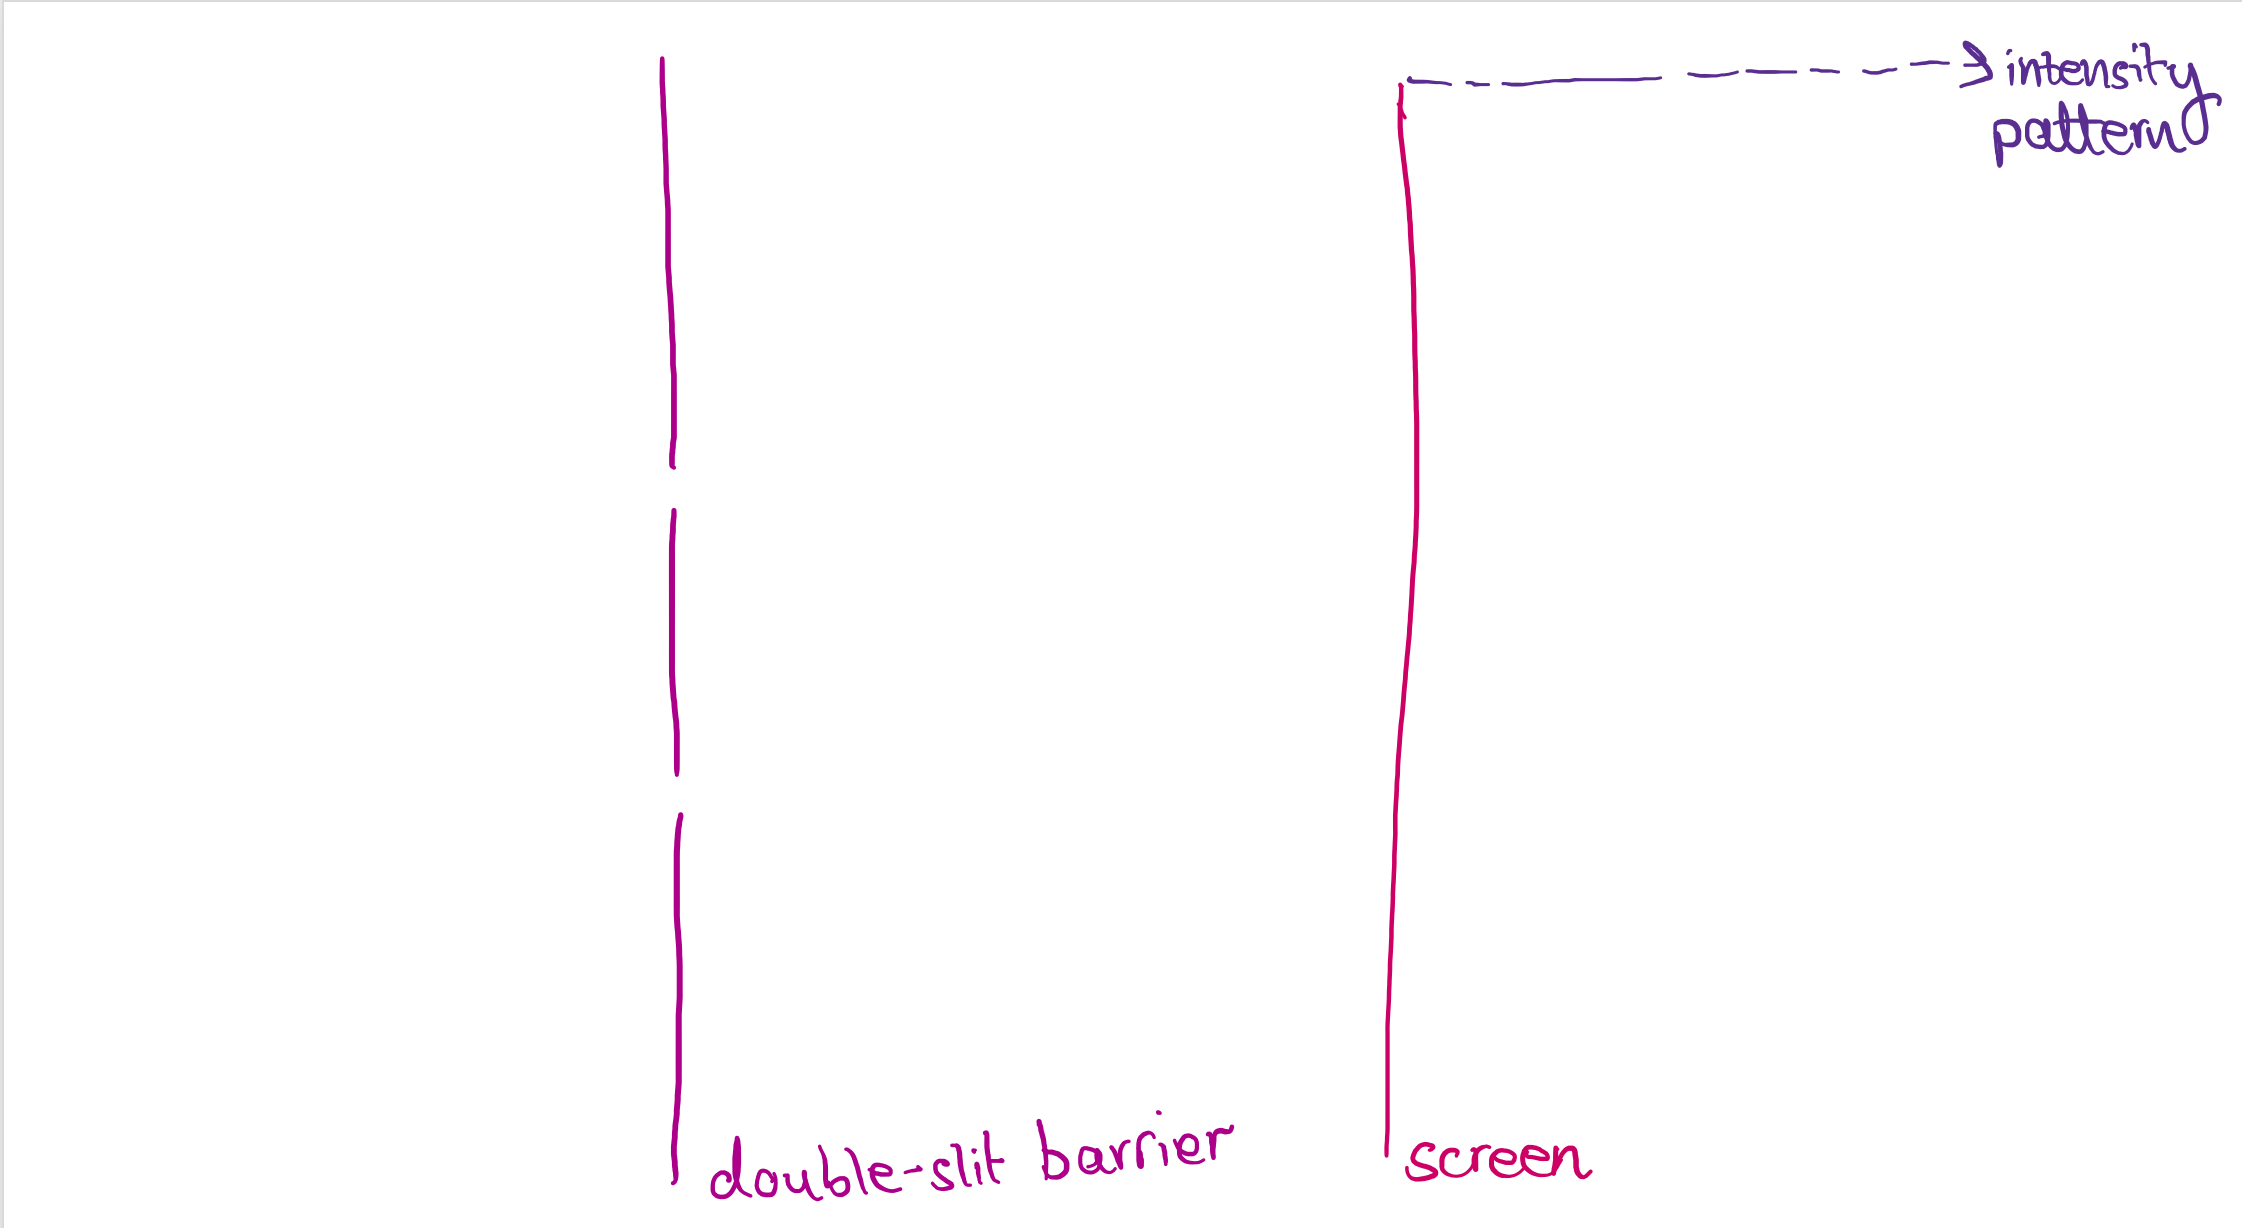

**Single-particle interference**

If we send a classical wave through two slits, then we expect to see an interference pattern on the screen at the other end. In some places there will be bright spots, where there was constructive interference of the waves. In some places there will be dim spots, where there was destructive interference of the waves. This kind of interference would happen to any kind of classical wave we sent through the slits, such as sound waves or water waves. 

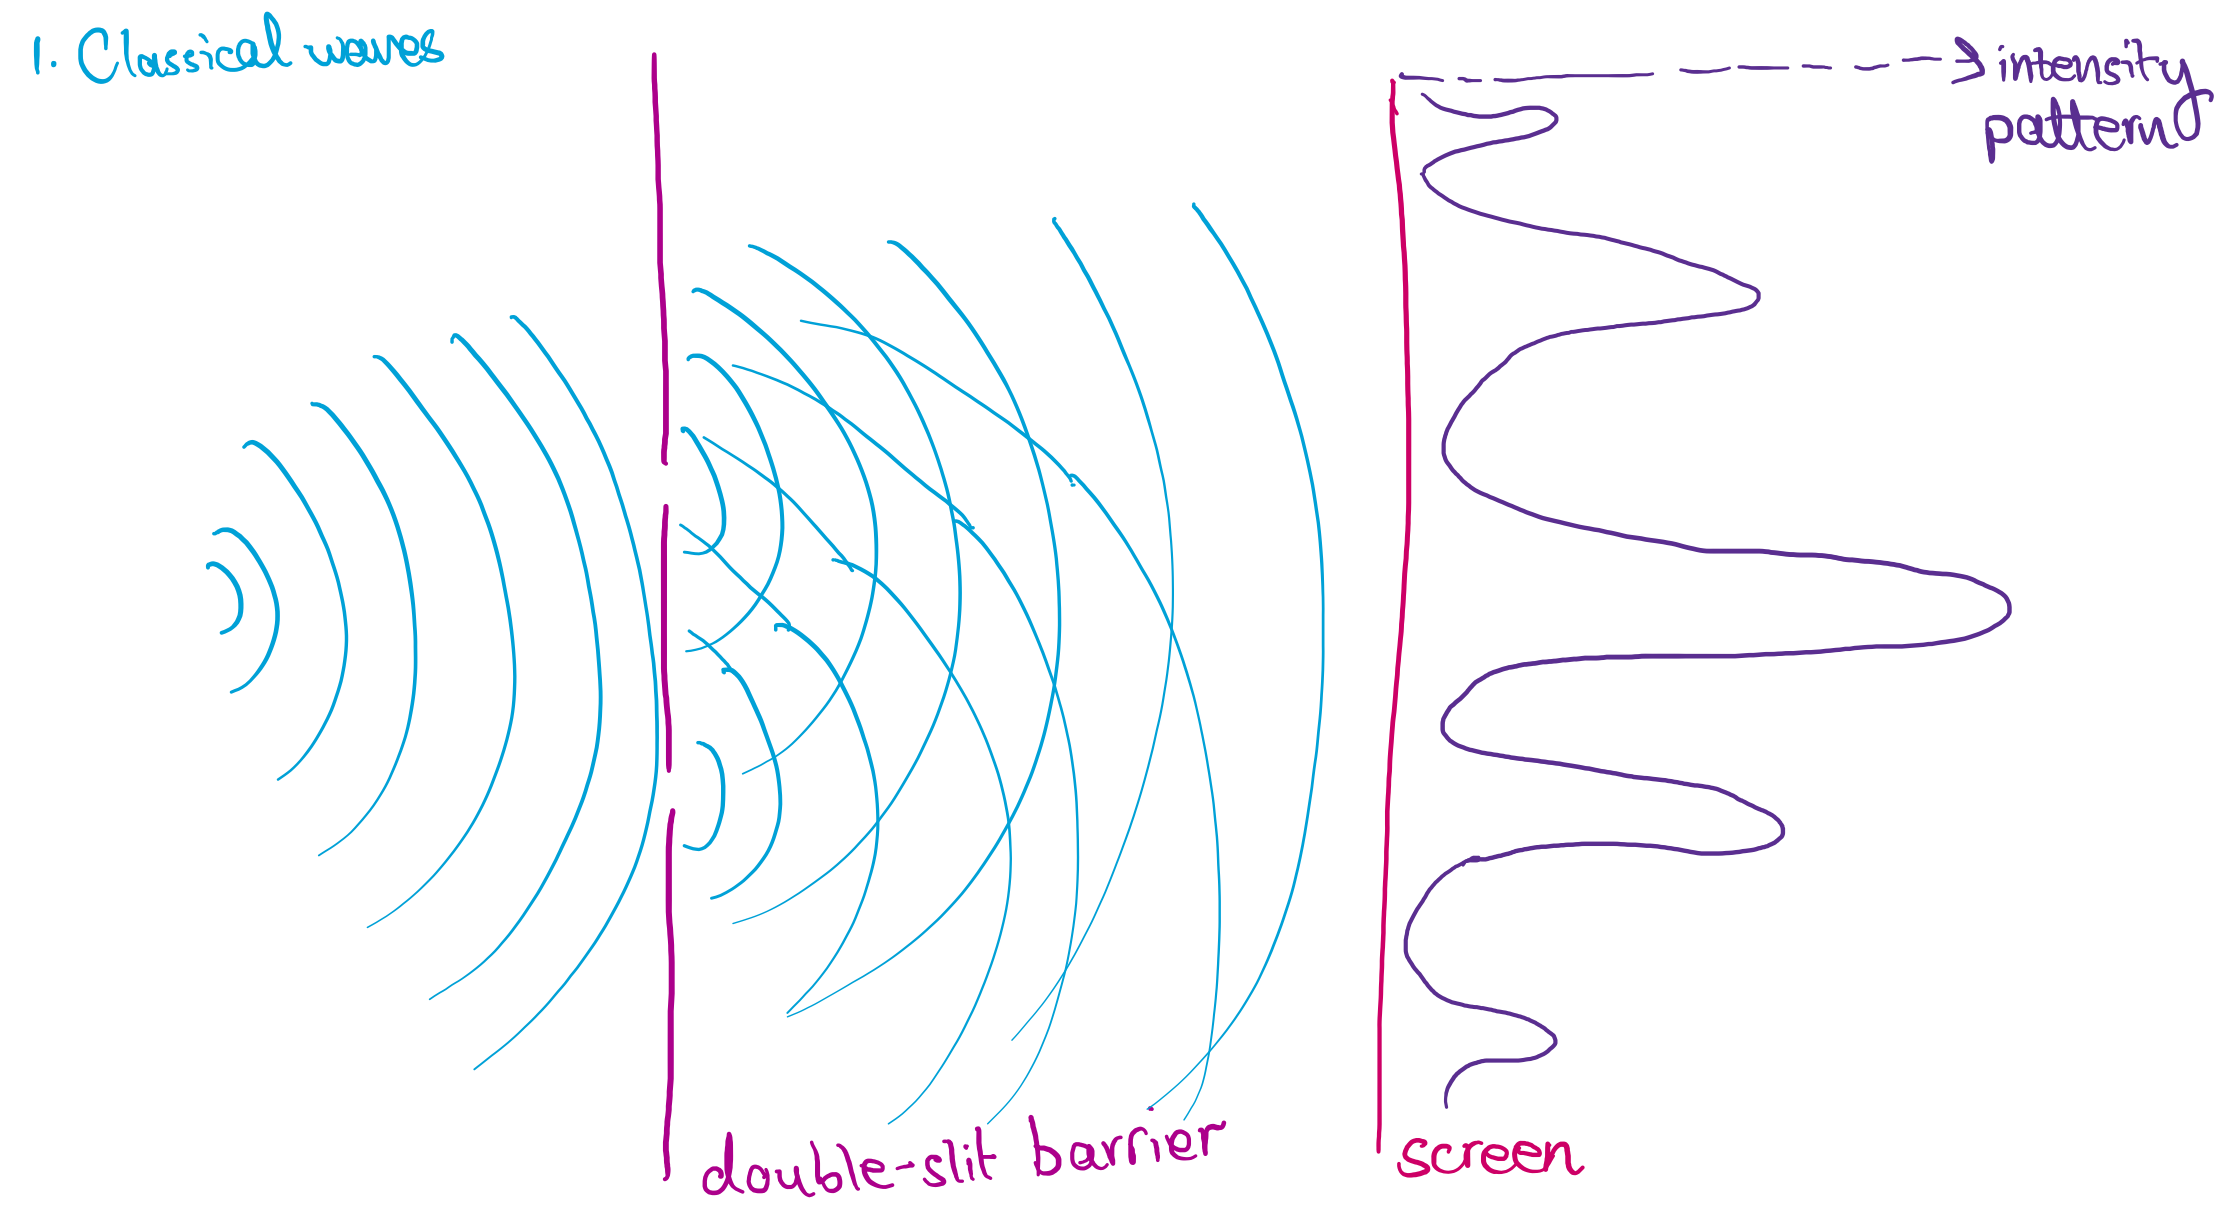

But here we are sending individual photons through the slits one by one. If they behaved as classical particles, they would either go through one slit or the other. After sending a stream of classical particles through the slits one by one, we would expect to see two bright regions on the screen, in front of each slit. 

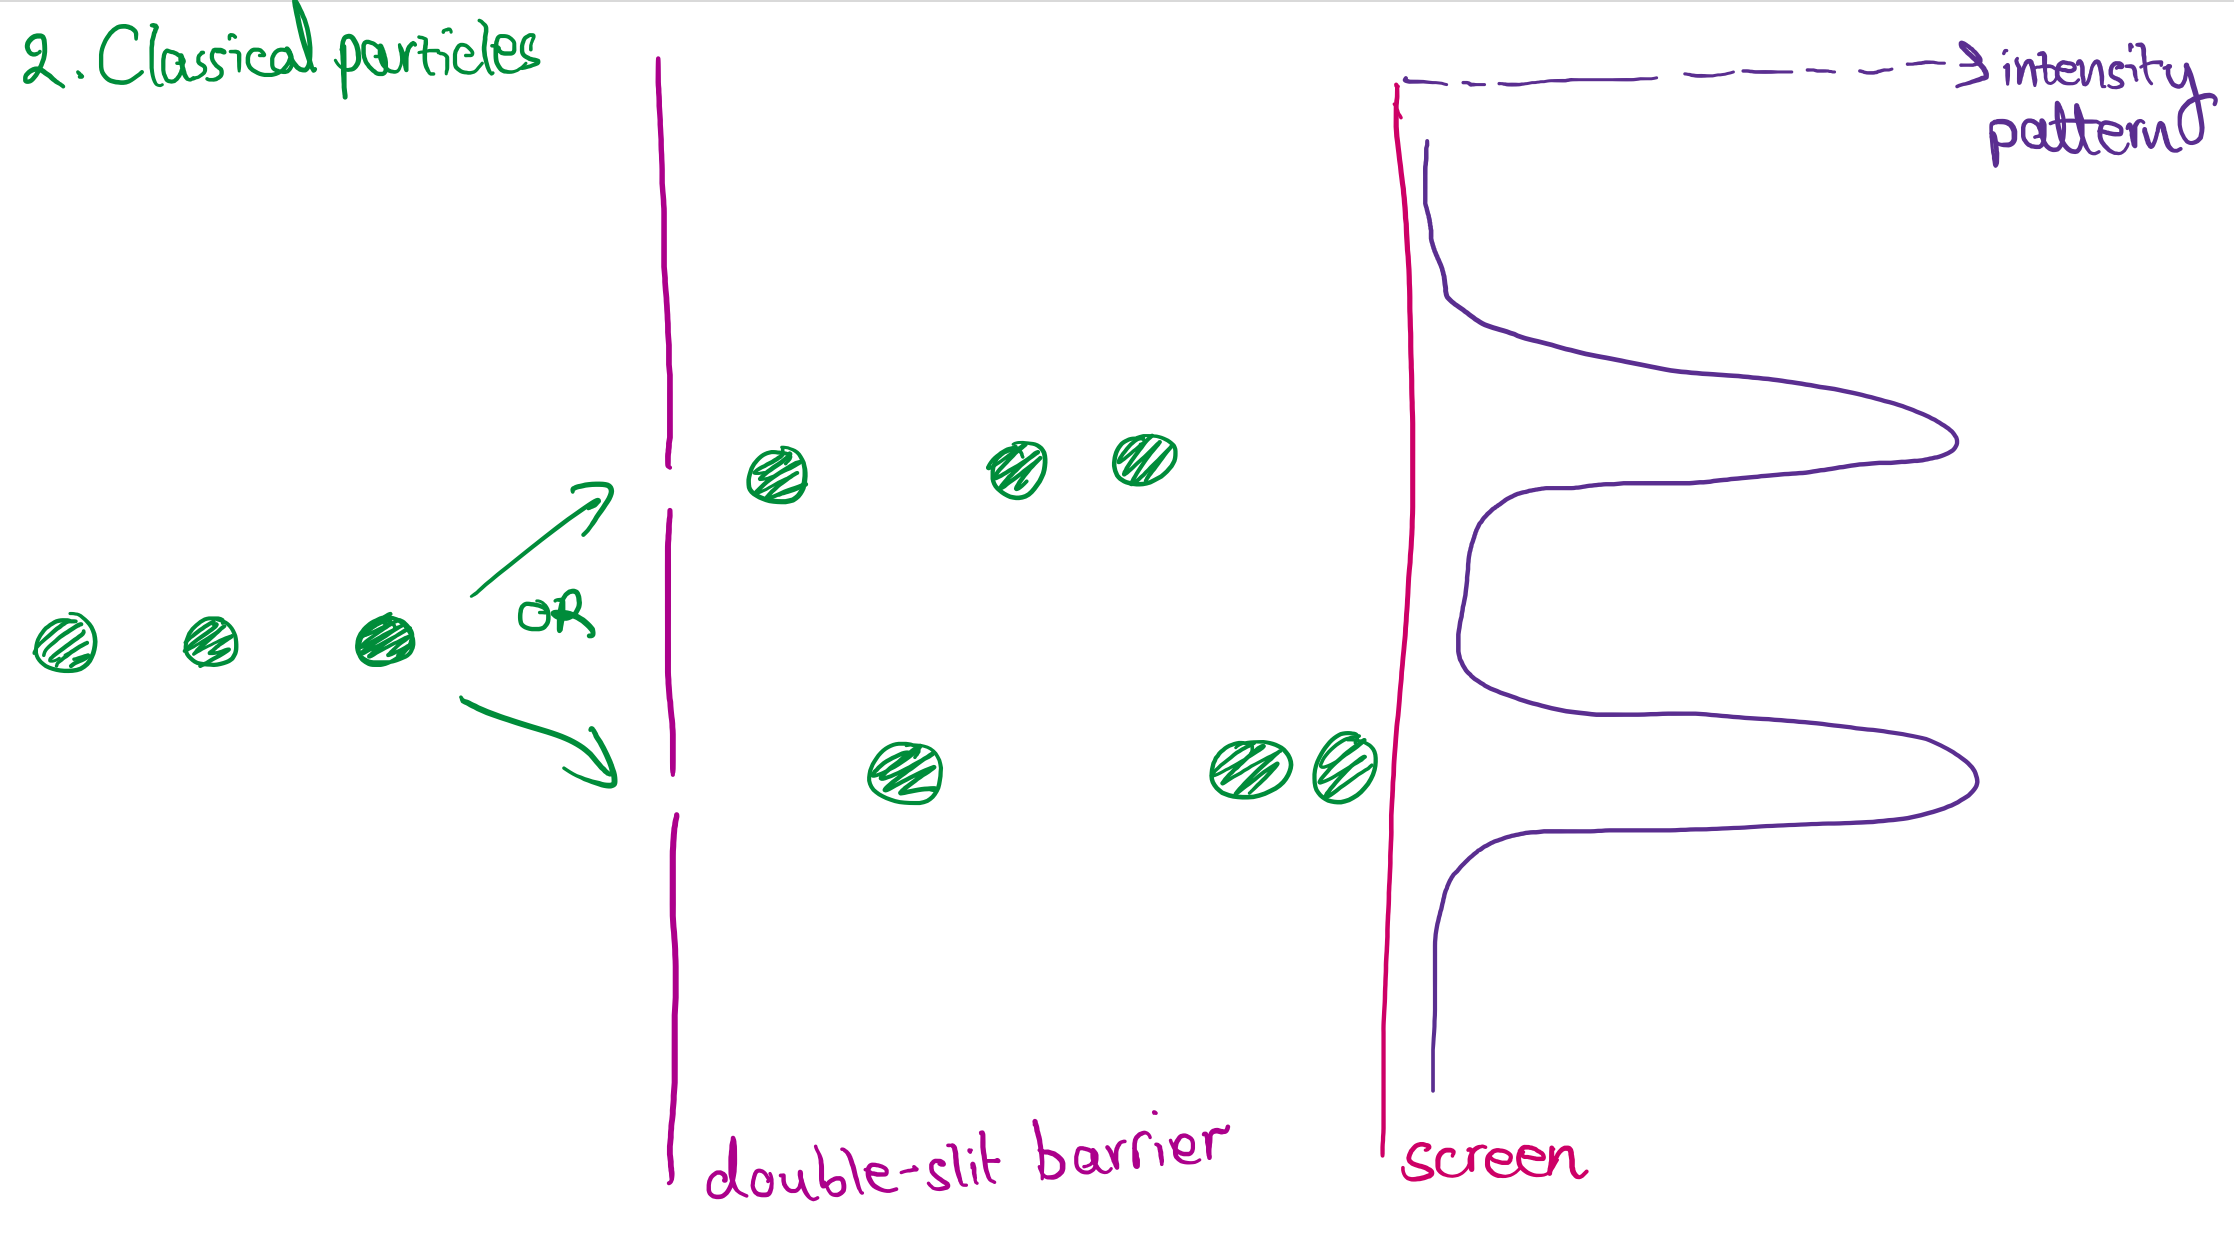

However, what we actually see in the distribution of photons in the screen is a series of light and dark regions. In other words, we see the outcome we would expect from sending a classical wave through two slits. 

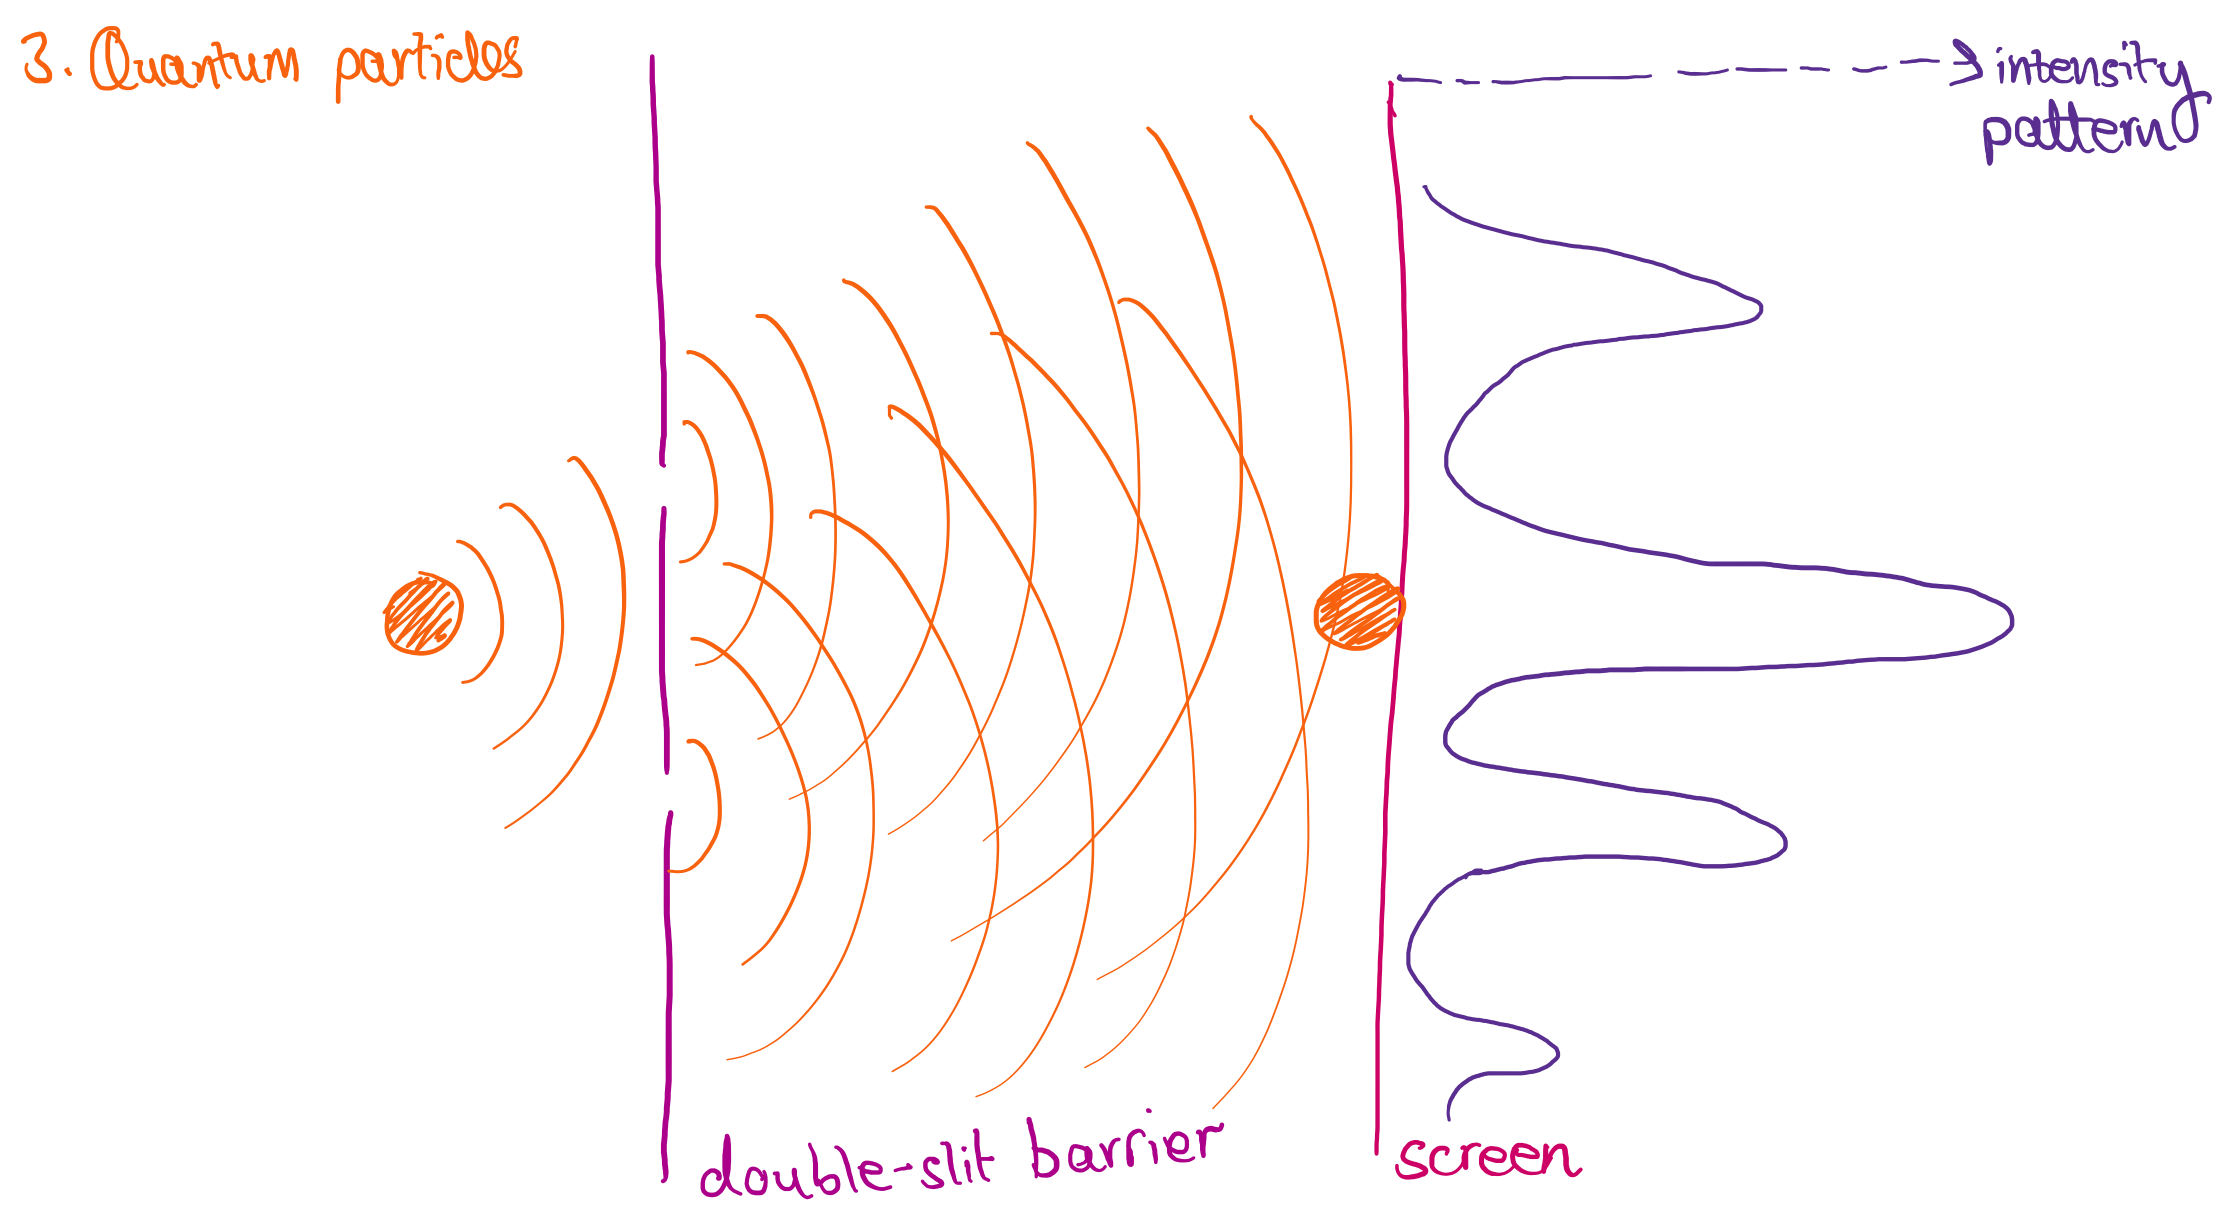

So somehow, the individual photon must be going through both slits, and interfering with itself! The actual wave here is the wavefunction of the photon. This is a fundamental quantity in quantum mechanics whose evolution is described by the Schrödinger equation, although scientists still debate its physical meaning. 

If we add a detector at the slits so we can try to observe whether the photon went through one slit or the other, then the pattern on the screen will be the same as if the photon only went through one slit each time. We will see just two bright regions on the screen, one from the photons that came from one slit and one from those that came from the other, meaning no photons interfered with themselves. 

**Translating the double-slit experiment to an interferometer setup**

A simpler way of seeing the key ideas of this thought experiment is to translate it to something called an interferometer, which we can easily represent as a quantum circuit. The process here is very similar to turning the quantum bomb tester thought experiment into a quantum circuit, which I explained in the [first video](https://youtu.be/fus1nJ6JaTk?si=CNiY6w3wYofooKCG) of the Quantum Paradox series.

A Mach-Zender interferometer uses a beamsplitter to split a single photon into a superposition of two paths: being reflected upwards or transmitted through. These two paths are analogous to a photon entering a superposition of going through both slits in the double-slit experiment. 

In the interferometer, we use mirrors to reflect the two beams of the superposition so that they will meet at a second beamsplitter. Here they constructively interfere, and merge back into one beam. There are detectors after the second beamsplitter, so we will always find that the photons are transmitted and not reflected at the second beamsplitter. This is our evidence of the photon interfering with itself, analogous to the bright and dark pattern of interference fringes on the screen in the double-slit experiment. 

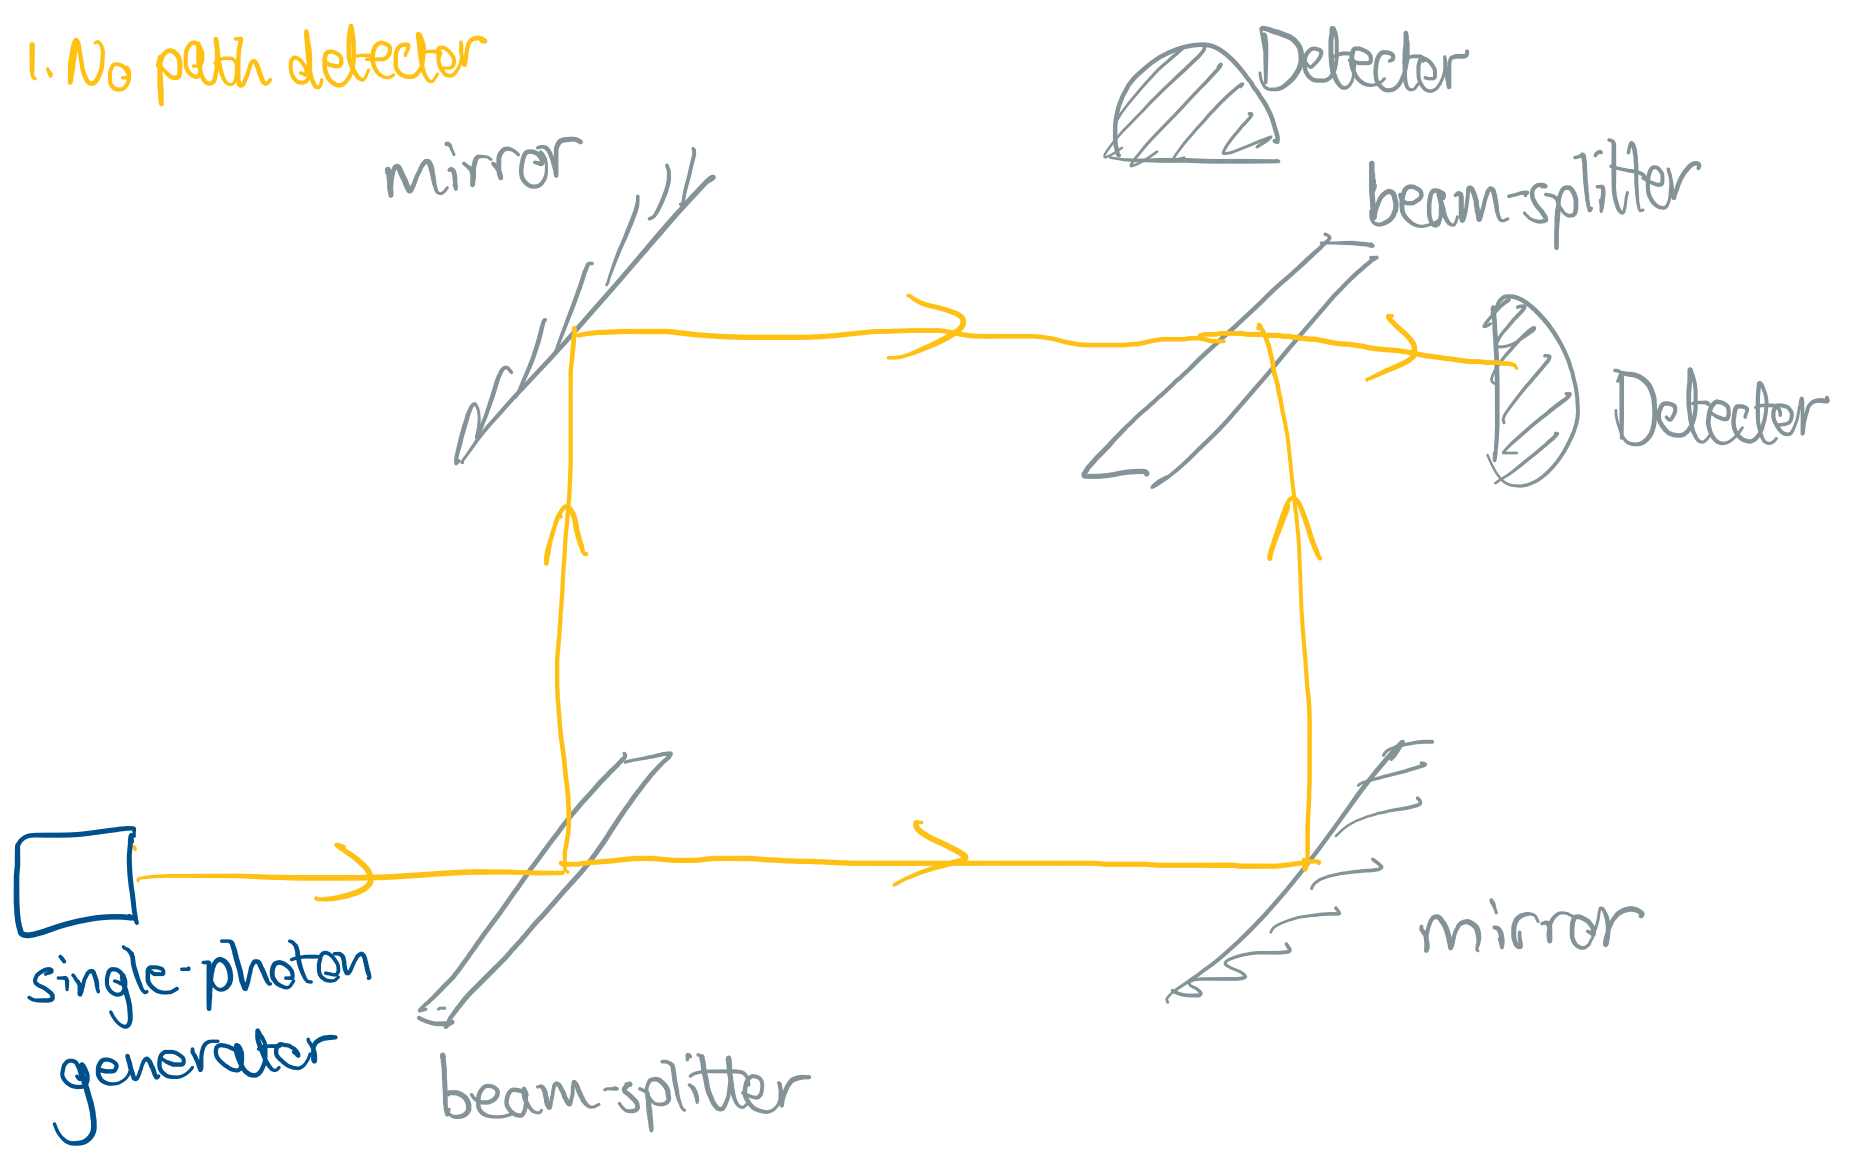

**Interferometer as a quantum circuit** 

To turn our interferometer into a quantum circuit, we can represent the beamsplitters as Hadamard gates, and represent the photon as a qubit, where |0⟩ represents the photon's state in the bottom path and |1⟩ represents the photon's state in the top path through the interferometer. 

The first beamsplitter sends the photon travelling along the bottom path into a superposition of taking both the top path and the bottom path. So the qubit ends up in a |+⟩ state, an equal superposition of |0⟩ and |1⟩. 

**Case 1: No detector**

The second beamsplitter has a superposition of states as input, which constructively interfere to merge into one state again, always hitting the detector on the right. We represent this by applying another Hadamard gate to the qubit in a |+⟩ state, which outputs the qubit again in the |0⟩ state. We detect the final state by applying a measurement at the end. Let's simulate this and see the outcome:

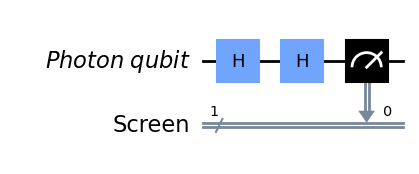

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name="Photon qubit")
cr = ClassicalRegister(1, name="Screen")
qc = QuantumCircuit(qr, cr)

# Apply the Hadamard gate to create a superposition of paths
qc.h(0)

# Apply another Hadamard gate to combine the paths
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

qc.draw("mpl")

In [2]:
from qiskit_aer import AerSimulator 
backend = AerSimulator()
result = backend.run(qc).result()
counts = result.get_counts(qc)
print(counts)

{'0': 1024}


The qubit was returned to 0, as expected for successful interference. 

**Case 2: Observing the path of the photon**

Now what happens if we measure which path the photon took? If we add a detector in one of the branches of the interferometer, then the photon is projected into either the top path or the bottom path. When it reaches the second beamsplitter, it can no longer interfere with itself, so it just splits into an equal superposition. This means that, at the end, both detectors have a 50% chance of going off. 

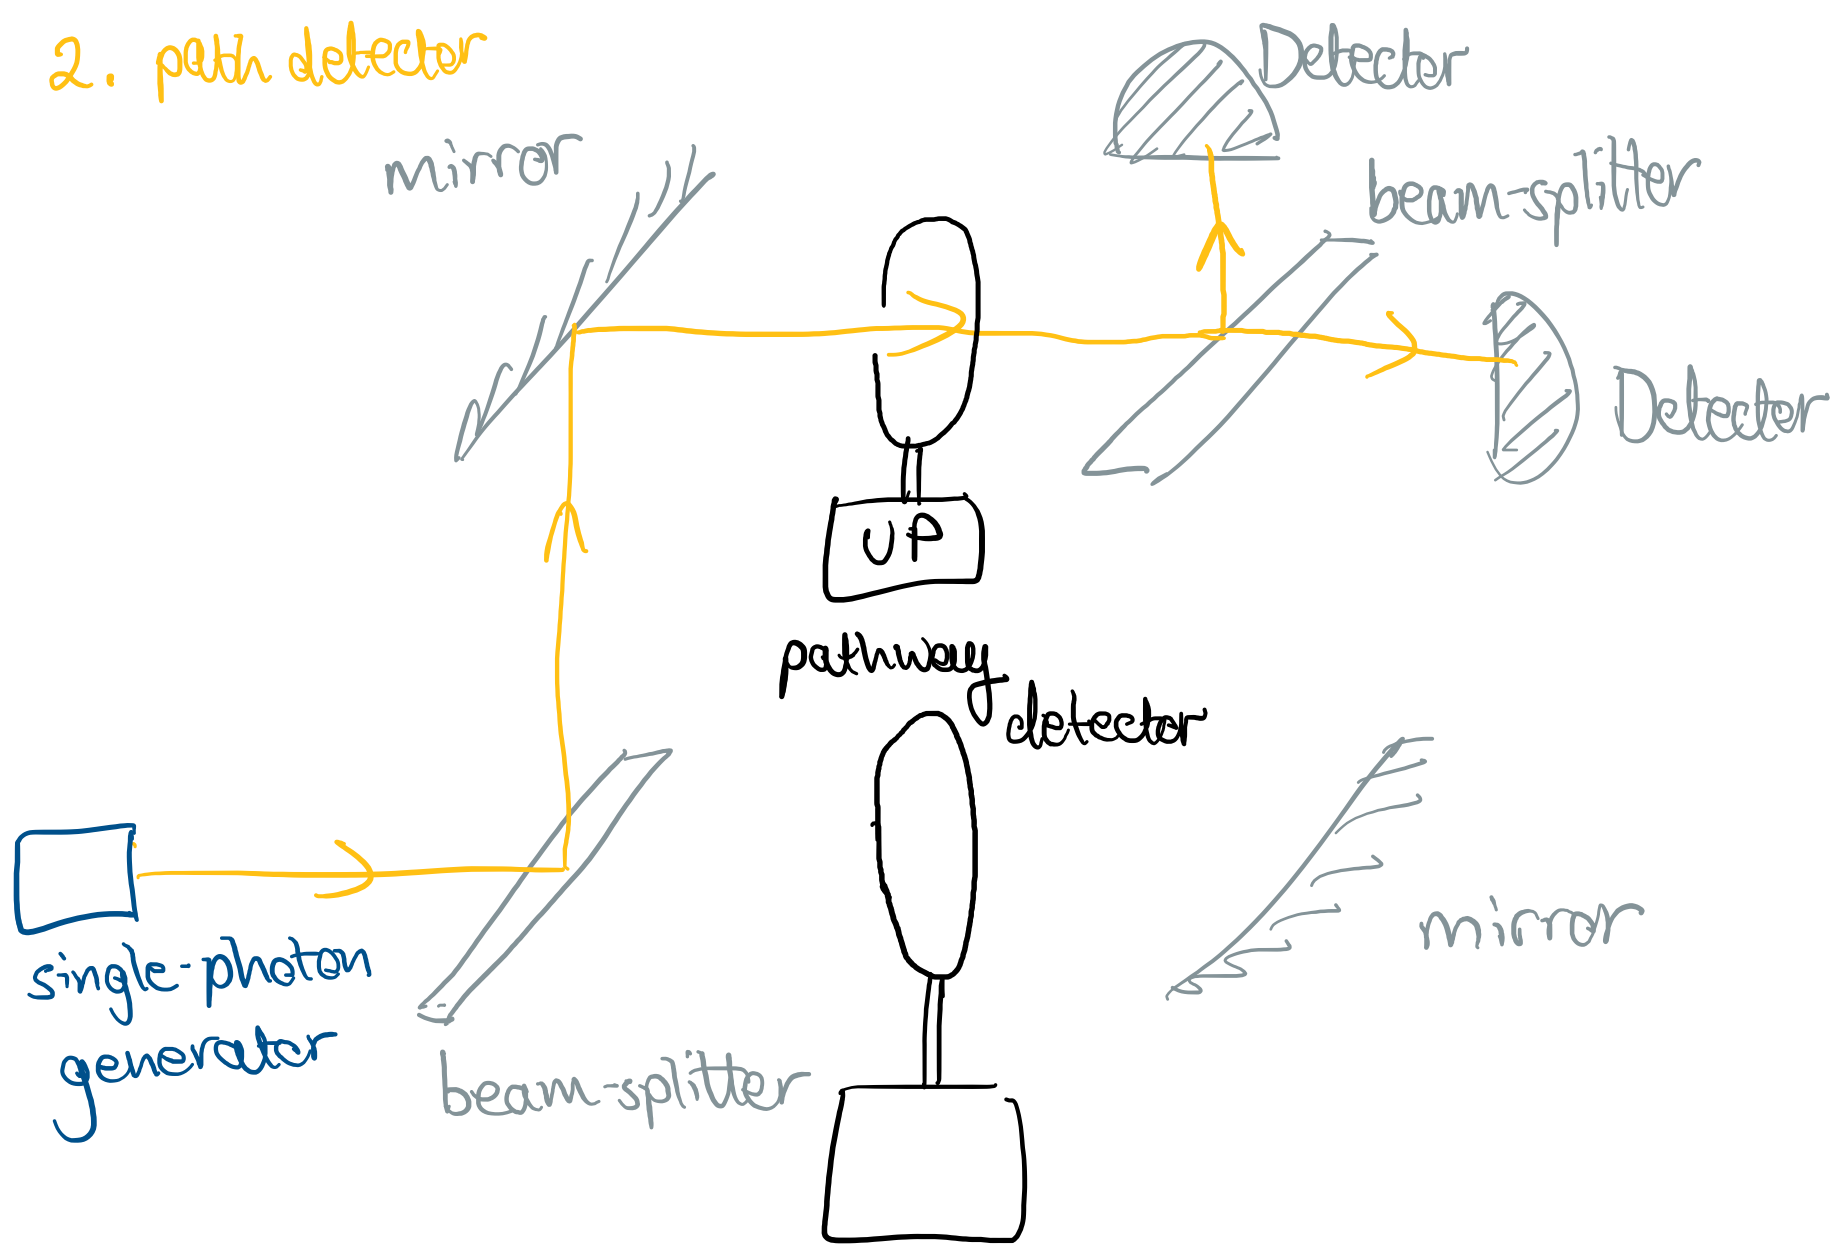

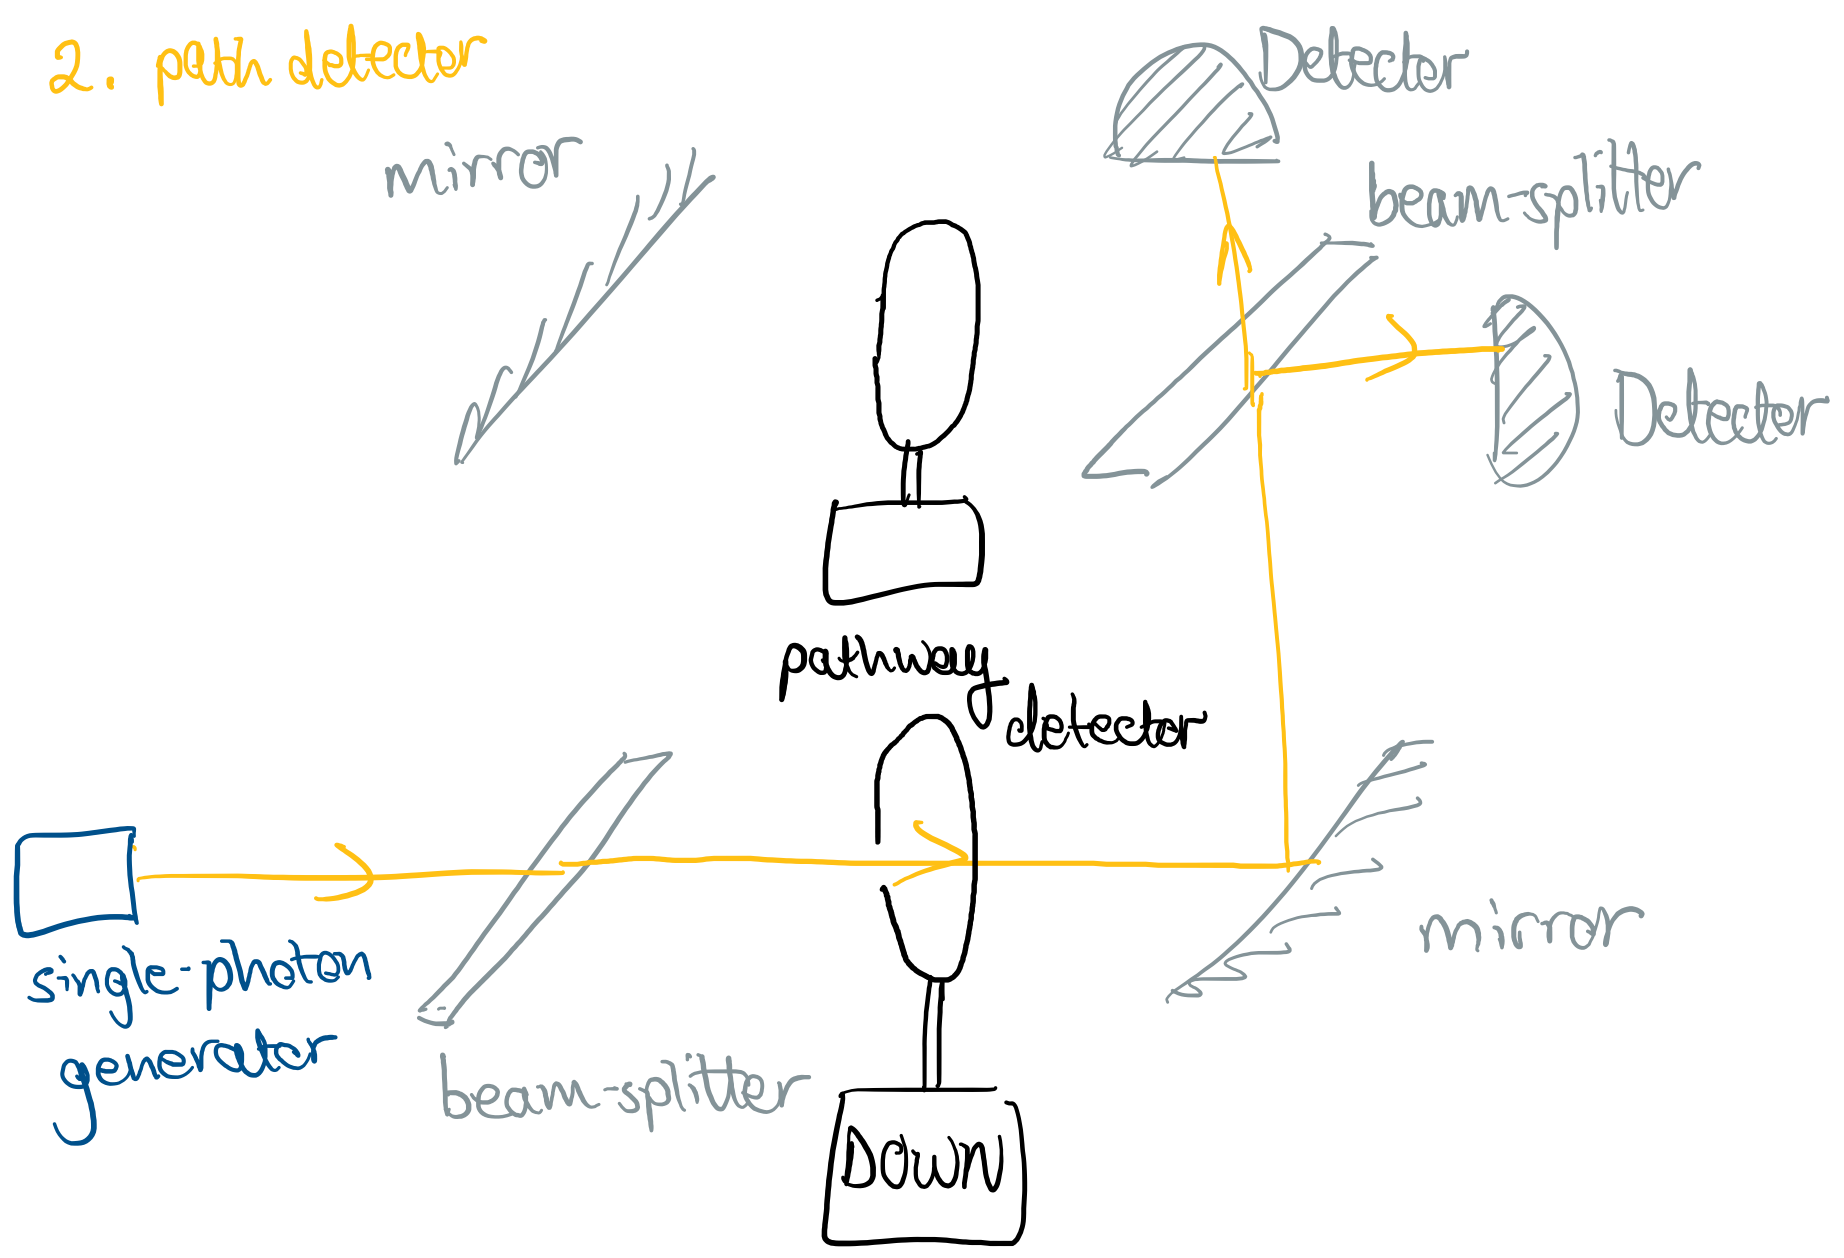

This is analogous to detecting which slit a photon went through in the double-slit experiment, which destroys the interference pattern on the screen and makes the photon behave as though it came from just one slit. 

In our quantum circuit, adding a detector to get the information about which path the photon took is equivalent to adding a measurement after the first Hadamard gate. When we do this, we see that instead of the outcomes of the final measurement being 0 everytime, they have an equal chance of being 0 and 1. 

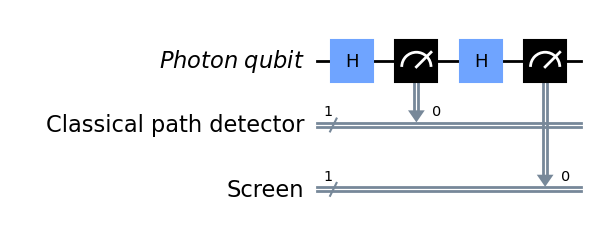

In [3]:
cr2 = ClassicalRegister(1, name="Classical path detector")

qc_case2 = QuantumCircuit(qr, cr2, cr)

# Apply the Hadamard gate to create a superposition of paths
qc_case2.h(0)

# Measure the qubit, collapsing the superposition
qc_case2.measure(0, 0)

# Apply another Hadamard gate
qc_case2.h(0)

# Measure the qubit again
qc_case2.measure(0, 1)

qc_case2.draw("mpl")

In [4]:
from qiskit.result import marginal_counts

result = backend.run(qc_case2).result()

marginal_result = marginal_counts(result.get_counts(qc_case2), indices=[1])
print(marginal_result)

{'0': 498, '1': 526}


**Case 3: A single-qubit detector**

The fact that the photon's behavior changes when we add a detector seems quite mysterious. How could the act of simply retrieving some information about the photon lead to a physical change in its behavior? One way to understand the mechanism by which this happens better is to model the detector as a physical quantum system. 

In our quantum circuit, we can model the detector as another qubit. Then, instead of directly adding a measurement between the Hadamard gates, we model the detection by adding a CNOT gate between the photon qubit and the detector qubit. Then, if the photon is in the state |0⟩ the detector will stay as |0⟩, and if the photon is in the state |1⟩ the detector will switch to the state |1⟩. The states of the detector and the photon have become entangled, so that they are perfectly correlated. 

Let's simulate what happens when we measure our photon, now that it is entangled with a detector:  

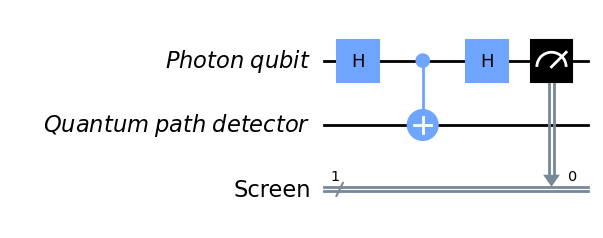

In [5]:
qr2 = QuantumRegister(1, name="Quantum path detector")
qc_case3 = QuantumCircuit(qr, qr2, cr)

# Apply the Hadamard gate to create a superposition of paths
qc_case3.h(0)

# Entangle the photon qubit with the detector qubit
qc_case3.cnot(0, 1)

# Apply another Hadamard gate
qc_case3.h(0)

# Measure the qubit again
qc_case3.measure(0, 0)

qc_case3.draw("mpl")

In [6]:
result = backend.run(qc_case3).result()
counts = result.get_counts(qc_case3)
print(counts)

{'0': 520, '1': 504}


We have an equal chance of getting |0⟩ and |1⟩! So, entangling the photon qubit with the detector qubit has the same effect as adding a measurement between the Hadamard gates. It prevents the photon from being able to interfere with itself. 

Even if we don't look at our little quantum detector to read the information, it still destroys the interference. This shows that it's not really our "observing" the path of the photon in the double-slit experiment that destroys the interference; it's the fact that we introduce something that becomes entangled with the photon. The photon's path information being copied to anything at all in its environment, whether intentionally by the experimenter or due to some uncontrolled interaction with the enviornment, will prevent it from interfering with itself. 

This is the mechanism behind decoherence. If a qubit in a superposition gets entangled with just one other system that is not under our control, then we lose the ability to manipulate its wave-like properties in the way that is required for quantum information processing. 

Note that it's not just any interaction between the qubits that stops the interference; it's only interactions that cause them to become entangled, which represents the photon's pathway information being copied to the qubit. For example, let's replace the CNOT gate with a CZ gate, which is not an entangling gate:  

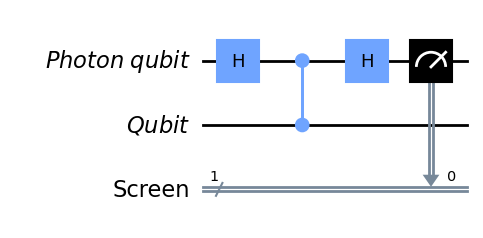

In [7]:
qr3 = QuantumRegister(1, name="Qubit")
qc_case4 = QuantumCircuit(qr, qr3, cr)

# Apply the Hadamard gate to create a superposition of paths
qc_case4.h(0)

qc_case4.cz(0, 1)

# Apply another Hadamard gate
qc_case4.h(0)

# Measure the qubit again
qc_case4.measure(0, 0)

qc_case4.draw("mpl")

In [8]:
result = backend.run(qc_case4).result()
counts = result.get_counts(qc_case4)
print(counts)

{'0': 1024}


We only get 0, meaning the interference is working again! Now that our extra qubit is not entangled with the photon qubit, it has no information about which path the photon took, so the photon can interfere with itself once more. 

Now you know how the strange phenomenon of single-particle interference can be mapped onto an interferometer and a very simple quantum circuit comprising just two Hadamard gates. The interference is destroyed when we add a measurement between the Hadamards. Using Qiskit, you can show that even a single qubit detector will destroy the ability of the system qubit to interfere with itself. 

Join us next time to resolve more quantum paradoxes!